In [19]:
import os

train_path = "../gtsrb-preprocessed/train"

if os.path.exists(train_path):
    print("✅ Train folder found!")
    print("Contents:", os.listdir(train_path))  # List files inside train folder
else:
    print("❌ Train folder NOT found. Check the path.")




✅ Train folder found!
Contents: ['.ipynb_checkpoints', '0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


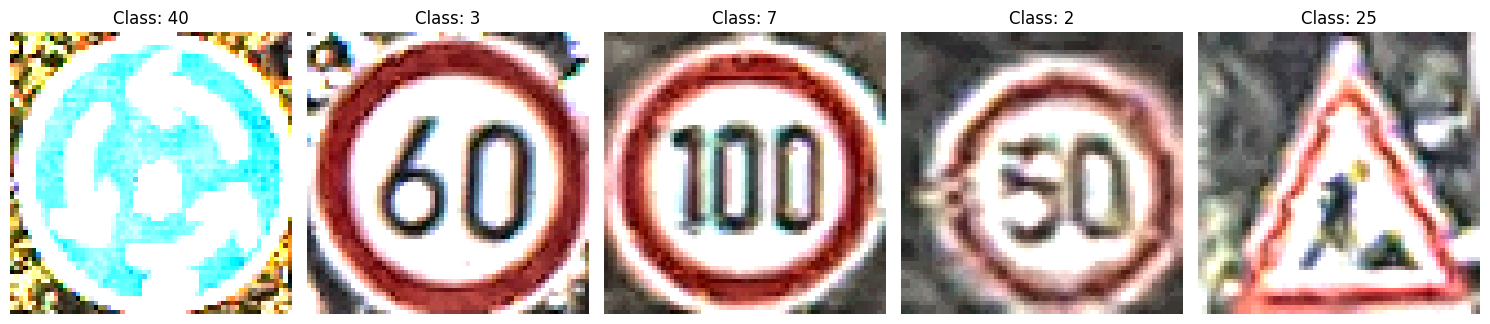

In [20]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt

# Function to enhance images with softer sharpening
def enhance_image(img):
    # Resize with smooth interpolation
    img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_CUBIC)  

    # Convert to LAB color space for balanced contrast adjustment
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8, 8))  # Lower contrast enhancement
    l = clahe.apply(l)

    lab = cv2.merge((l, a, b))
    img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

    # **Reduce Sharpening Intensity**
    sharpening_kernel = np.array([[0, -0.2, 0], [-0.2, 2.5, -0.2], [0, -0.2, 0]])
    img = cv2.filter2D(img, -1, sharpening_kernel)

    return img

# Function to display images
def display_random_images(dataset_path, num_classes=5):
    class_folders = [folder for folder in sorted(os.listdir(dataset_path)) if os.path.isdir(os.path.join(dataset_path, folder))]
    num_classes = min(num_classes, len(class_folders))
    selected_classes = random.sample(class_folders, num_classes)

    plt.figure(figsize=(15, 5))

    for i, class_name in enumerate(selected_classes):
        class_path = os.path.join(dataset_path, class_name)
        image_files = os.listdir(class_path)

        if not image_files:
            continue

        random_image = random.choice(image_files)
        img_path = os.path.join(class_path, random_image)

        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠️ Warning: Could not load image {img_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = enhance_image(img)  # Apply refined processing

        plt.subplot(1, num_classes, i + 1)
        plt.imshow(img)
        plt.title(f"Class: {class_name}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Call function
train_path = "../gtsrb-preprocessed/train"
display_random_images(train_path, num_classes=5)
